# Scenario Discovery Analysis

This notebook performs scenario discovery analysis using the `ema_workbench` library.

In [7]:
# Import necessary libraries
from pathlib import Path
import ema_workbench
import pandas as pd
import numpy as np
import scenario_discovery_functions.scenario_discovery_functions as sdf

import importlib
importlib.reload(sdf)

# Define constants
CURR_DIR = Path().parent


### Load Data

The following function loads the data from a CSV file and prepares it for analysis.

In [2]:
def load_data():
    data = pd.read_csv(CURR_DIR / "ema_road_model_27_05_2024_results.csv", index_col=0)
    simulation_input_df = data.iloc[:, :-3]
    simulation_output_dict = data.iloc[:, -3:].to_dict()
    simulation_output_dict = {
        key: np.array(list(value.values()))
        for key, value in simulation_output_dict.items()
    }  # Convert the dictionary values to numpy arrays
    return simulation_input_df, simulation_output_dict

Create a class to suppress print output

In [3]:
import sys
import os

class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout



## Logistic Regression analysis

The main function loads the data and prepares it for logistic regression.

In [4]:
# Load data and create logistic regression object without printing the output
simulation_input, simulation_output = load_data()

with SuppressOutput():
    lr_object = sdf.logistic_regression(simulation_input, simulation_output["combined_vkm.csv_year"], "lower_quartile", "less")


/home/moorens/code/venv/lib/python3.10/site-packages/ema_workbench/analysis/logistic_regression.py:257: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.peeling_trajectory = pd.concat(
/home/moorens/code/venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/moorens/code/venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/moorens/code/venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation

In [5]:
lr_object.inspect(0)
lr_object.inspect(1)
lr_object.inspect(2)
lr_object.inspect(3)
lr_object.inspect(4)

/home/moorens/code/venv/lib/python3.10/site-packages/ema_workbench/analysis/logistic_regression.py:67: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


    coverage   density  thresholds
0       1.00  0.250000         0.0
1       1.00  0.641026         0.1
2       0.96  0.685714         0.2
3       0.92  0.741935         0.3
4       0.80  0.740741         0.4
5       0.80  0.769231         0.5
6       0.76  0.863636         0.6
7       0.68  0.894737         0.7
8       0.52  0.928571         0.8
9       0.28  0.875000         0.9
10      0.00       NaN         1.0

                            Results: Logit
Model:                 Logit             Method:            MLE       
Dependent Variable:    y                 Pseudo R-squared:  0.624     
Date:                  2024-08-19 17:27  AIC:               46.2340   
No. Observations:      100               BIC:               51.4443   
Df Model:              1                 Log-Likelihood:    -21.117   
Df Residuals:          98                LL-Null:           -56.234   
Converged:             1.0000            LLR p-value:       5.2697e-17
No. Iterations:        9.0000          

/home/moorens/code/venv/lib/python3.10/site-packages/ema_workbench/analysis/logistic_regression.py:67: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
/home/moorens/code/venv/lib/python3.10/site-packages/ema_workbench/analysis/logistic_regression.py:67: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
/home/moorens/code/venv/lib/python3.10/site-packages/ema_workbench/analysis/logistic_regression.py:67: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
/home/moorens/code/venv/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/moorens/code/venv/lib/python3.10/site-packages/ema_workbench/analysis/logistic_regression.py:67: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


## Patient Rule Induction Method



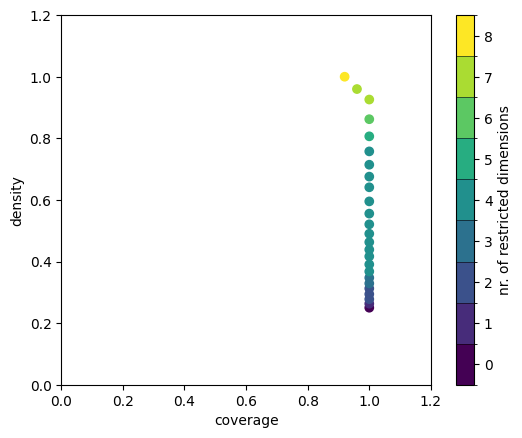

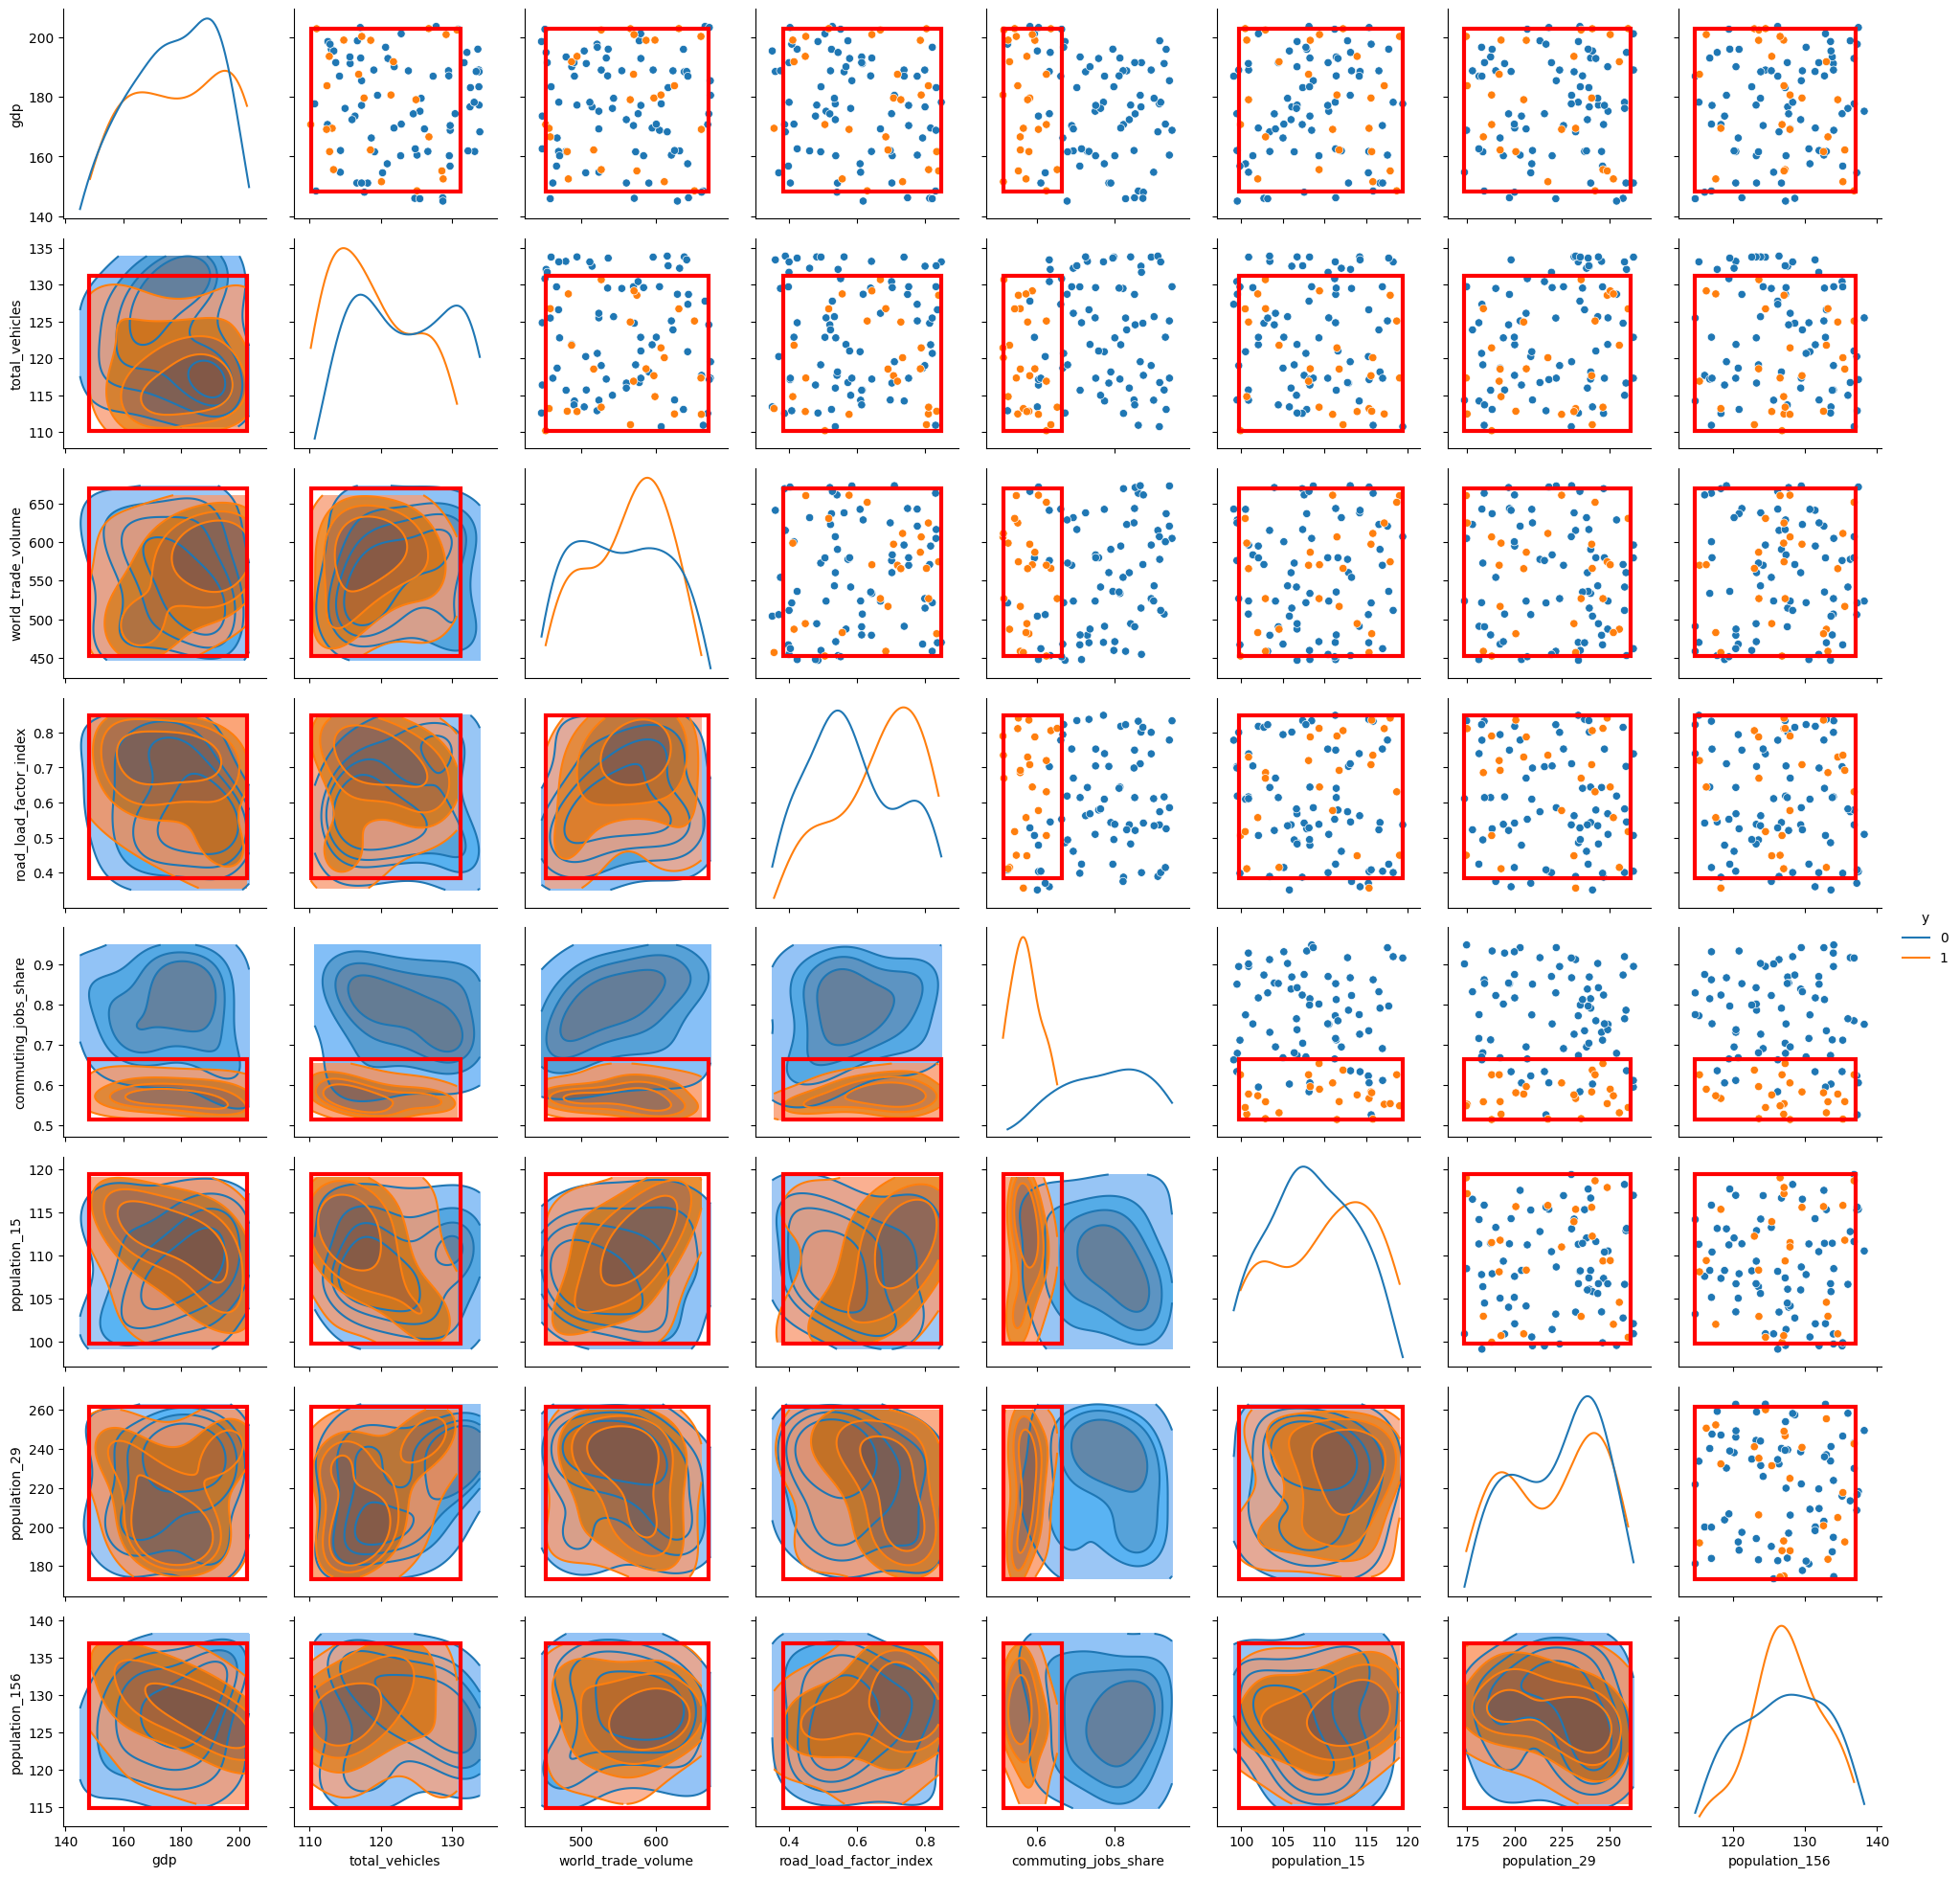

In [8]:
prim_object, box = sdf.prim(simulation_input, simulation_output["combined_vkm.csv_year"])